In [2]:
import pandas as pd
import numpy as np
import xlrd

In [3]:
book = xlrd.open_workbook('Video Games Data.xlsx')
for sheet in book.sheets():
    print(sheet.name)
# df = pd.read_excel(r'VideoGamesData.xlsx')
# print(df)

Google Trends Data
Video_Games_Sales_as_at_22_Dec_


In [4]:
sales = book.sheet_by_name('Video_Games_Sales_as_at_22_Dec_')
# print(dir(trend))
na_sales = {}

for i in range(sales.nrows):
    row = sales.row_values(i)
    name = row[0]
    if isinstance(name, str) and "Madden NFL" in name:
        # print(row[0], "\t", row[5])
        na_sales[name] = na_sales.get(name, 0) + row[5]

print(na_sales)

{'Madden NFL 2004': 5.8999999999999995, 'Madden NFL 06': 7.680000000000001, 'Madden NFL 2005': 6.8500000000000005, 'Madden NFL 07': 8.659999999999998, 'Madden NFL 2003': 4.800000000000001, 'Madden NFL 2002': 4.920000000000001, 'Madden NFL 13': 5.6, 'Madden NFL 10': 6.55, 'Madden NFL 12': 4.97, 'Madden NFL 11': 5.859999999999999, 'Madden NFL 08': 7.119999999999999, 'Madden NFL 09': 6.07, 'Madden NFL 25': 4.88, 'Madden NFL 15': 5.7, 'Madden NFL 2000': 2.26, 'Madden NFL 99': 2.5, 'Madden NFL 2001': 3.37, 'Madden NFL 98': 1.29, 'Madden NFL 97': 0.73, 'Madden NFL 09 All-Play': 0.76, 'Madden NFL Football': 0.36}


In [5]:
trend = book.sheet_by_name('Google Trends Data')
# print(dir(trend))

data = [0] * len(trend.row_values(0))
for i in range(3, trend.nrows):
    row = trend.row_values(i)
    for i in range(len(row)):
        if not isinstance(row[i], str):
            data[i] += row[i]

# print(data)
web = {}
shop = {}
switched = False
for i in range(1, len(trend.row_values(2))):
    name = trend.row_values(2)[i]
    if name == "Month":
        switched = True
        continue
    name = name[:-17]
    if not switched and name != "":
        web[name] = data[i]
    else:
        shop[name] = data[i]

print(web)
print()
print(shop)

{'Madden NFL': 6595.0, 'Madden NFL 17': 568.0, 'Madden NFL 07': 552.0, 'Madden NFL 06': 516.0, 'Madden NFL 08': 719.0, 'Madden NFL 2005': 596.0, 'Madden NFL 10': 570.0, 'Madden NFL 09': 434.0, 'Madden NFL 16': 629.0, 'Madden NFL 15': 615.0, 'Madden NFL 13': 583.0, 'Madden NFL 11': 565.0}

{'': 0, 'Madden NFL': 4504.0, 'Madden NFL 17': 836.0, 'Madden NFL 07': 955.0, 'Madden NFL 06': 1081.0, 'Madden NFL 08': 680.0, 'Madden NFL 2005': 1146.0, 'Madden NFL 10': 696.0, 'Madden NFL 09': 760.0, 'Madden NFL 16': 737.0, 'Madden NFL 15': 759.0, 'Madden NFL 13': 472.0, 'Madden NFL 11': 600.0}


In [6]:
def intersection(lst1, lst2): 
    return [value for value in lst1 if value in lst2] 

overlap_lst = intersection(na_sales.keys(), web.keys())
print(overlap_lst, "\n")

overlap_info = []
for k in overlap_lst:
    overlap_info.append([na_sales[k], web[k], shop[k]])

overlap_info = np.array(overlap_info)
print(overlap_info)

['Madden NFL 06', 'Madden NFL 2005', 'Madden NFL 07', 'Madden NFL 13', 'Madden NFL 10', 'Madden NFL 11', 'Madden NFL 08', 'Madden NFL 09', 'Madden NFL 15'] 

[[   7.68  516.   1081.  ]
 [   6.85  596.   1146.  ]
 [   8.66  552.    955.  ]
 [   5.6   583.    472.  ]
 [   6.55  570.    696.  ]
 [   5.86  565.    600.  ]
 [   7.12  719.    680.  ]
 [   6.07  434.    760.  ]
 [   5.7   615.    759.  ]]


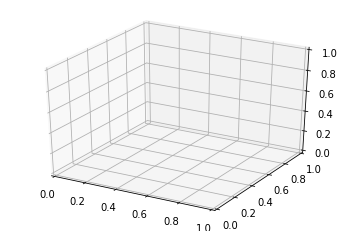

In [7]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

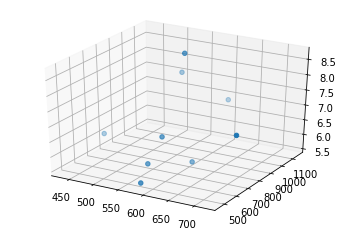

In [8]:
ax = plt.axes(projection='3d')
ax.scatter3D(overlap_info[:, 1], overlap_info[:, 2], overlap_info[:, 0])

In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

X, Y, Z = overlap_info[:, 1], overlap_info[:, 2], overlap_info[:, 0]
data = pd.DataFrame({'x': X, 'y': Y, 'z': Z})

model = ols("z ~ x + y", data).fit()

print(model.summary())
print()
print("Params:", model._results.params)

anova_results = anova_lm(model)
print()
print('ANOVA results')
print(anova_results)

plt.show()

OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2.428
Date:                Mon, 27 Apr 2020   Prob (F-statistic):              0.169
Time:                        17:48:17   Log-Likelihood:                -9.7543
No. Observations:                   9   AIC:                             25.51
Df Residuals:                       6   BIC:                             26.10
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0810      2.820      1.093      0.317      -3.819       9.981
x

In [10]:
# Z - 3.08100913e+00 ~= 1.95790742e-03 * X + 3.11619732e-03 * Y
# 1. Madden NFL 17
params = model._results.params
print(web["Madden NFL 17"], shop["Madden NFL 17"])
print("Madden NFL 17:", params[0] + params[1] * web["Madden NFL 17"] + params[2] * shop["Madden NFL 17"])

# 2. Madden NFL 16
nfl_16 = web["Madden NFL 16"], shop["Madden NFL 16"]
print()
print(nfl_16[0], nfl_16[1])
print("Madden NFL 16:", params[0] + params[1] * nfl_16[0] + params[2] * nfl_16[1])

568.0 836.0
Madden NFL 17: 6.798241501460528

629.0 737.0
Madden NFL 16: 6.609170319133687


In [11]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

X, Y, Z = overlap_info[:, 1], overlap_info[:, 2], overlap_info[:, 0]
data = pd.DataFrame({'x': X, 'y': Y, 'z': Z, 'xy' : np.multiply(overlap_info[:, 1], overlap_info[:, 2])})

model = ols("z ~ x + y + xy", data).fit()

print(model.summary())
print()
print("Params:", model._results.params)

anova_results = anova_lm(model)
print()
print('ANOVA results')
print(anova_results)

plt.show()

OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2.470
Date:                Mon, 27 Apr 2020   Prob (F-statistic):              0.177
Time:                        17:48:17   Log-Likelihood:                -8.3317
No. Observations:                   9   AIC:                             24.66
Df Residuals:                       5   BIC:                             25.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.6014     16.120     -1.154      0.301     -60.039      22.836
x

In [12]:
params = model._results.params

# 1. Madden NFL 17
nfl_17 = 1, web["Madden NFL 17"], shop["Madden NFL 17"], web["Madden NFL 17"] * shop["Madden NFL 17"]
print(nfl_17)
print("Madden NFL 17:", np.dot(nfl_17, params))

# 2. Madden NFL 16
nfl_16 = 1, web["Madden NFL 16"], shop["Madden NFL 16"], web["Madden NFL 16"] * shop["Madden NFL 16"]
print()
print(nfl_16)
print("Madden NFL 16:", np.dot(nfl_16, params))

(1, 568.0, 836.0, 474848.0)
Madden NFL 17: 6.664831268830117

(1, 629.0, 737.0, 463573.0)
Madden NFL 16: 6.501718181631805


# Prediction with Critic scores etc.

In [14]:
sales = book.sheet_by_name('Video_Games_Sales_as_at_22_Dec_')
# print(dir(trend))
sales_v_scores = []

for i in range(1, sales.nrows):
    row = sales.row_values(i)
    name = row[0]
    # if isinstance(name, str) and "Madden NFL" in name:
        # print(row[0], "\t", row[5])
    if row[5] and all(row[10:14]):
        row_data = [row[5], row[10], row[11], row[12], row[13]]
        sales_v_scores.append([float(e) for e in row_data])

sales_v_scores = np.array(sales_v_scores)
print(sales_v_scores)

[[4.136e+01 7.600e+01 5.100e+01 8.000e+00 3.220e+02]
 [1.568e+01 8.200e+01 7.300e+01 8.300e+00 7.090e+02]
 [1.561e+01 8.000e+01 7.300e+01 8.000e+00 1.920e+02]
 ...
 [1.000e-02 4.600e+01 4.000e+00 2.400e+00 2.100e+01]
 [1.000e-02 8.100e+01 1.200e+01 8.800e+00 9.000e+00]
 [1.000e-02 6.100e+01 1.200e+01 5.800e+00 4.300e+01]]


In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

X1, X2, Y1, Y2, Z = sales_v_scores[:, 1], sales_v_scores[:, 2], sales_v_scores[:, 3], sales_v_scores[:, 4], sales_v_scores[:, 0]
reviews_data = pd.DataFrame({
    'x': X1, 'y': X2, 'a': Y1, 'b': Y2, 'z': Z,
    'xy': np.multiply(X1, X2), 'ab': np.multiply(Y1, Y2),
    'xa': np.multiply(X1, Y1)
})

reviews_model = ols("z ~ x + y + xy + a + b + ab + xa", reviews_data).fit()

print(reviews_model.summary())
print()
print("Params:", reviews_model._results.params)

reviews_anova_results = anova_lm(reviews_model)
print()
print('ANOVA results')
print(reviews_anova_results)

plt.show()

OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          2.71e-222
Time:                        18:09:19   Log-Likelihood:                -8530.4
No. Observations:                6416   AIC:                         1.708e+04
Df Residuals:                    6408   BIC:                         1.713e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8214      0.202      4.066      0.000       0.425       1.217
x

In [18]:
print(reviews_model._results.params)
def predict_review(c_score, c_cnt, u_score, u_cnt):
    vars = np.array([1, c_score, c_cnt, c_score * c_cnt, u_score, u_cnt, u_score * u_cnt, c_score * u_score])
    return np.dot(vars, reviews_model._results.params)

[ 8.21352957e-01 -7.67518761e-03 -3.81645113e-02  6.19637364e-04
 -7.40157265e-02  3.42363557e-04 -2.11723745e-05  8.16276210e-04]


## Should do a two-way ANOVA on the a+b vs a+b+ab

# Save data to DB

In [22]:
import pickle

sales = book.sheet_by_name('Video_Games_Sales_as_at_22_Dec_')
# print(dir(trend))
sales_data = {}

for i in range(1, sales.nrows):
    row = sales.row_values(i)
    name = row[0]
    # if isinstance(name, str) and "Madden NFL" in name:
        # print(row[0], "\t", row[5])
    if row[5] and all(row[10:14]):
        row_data = [row[5], row[10], row[11], row[12], row[13]]
        sales_data[name] = [float(e) for e in row_data]

pickle.dump(sales_data, open( "sales.p", "wb" ))

In [23]:
trend = book.sheet_by_name('Google Trends Data')
# print(dir(trend))

data = [0] * len(trend.row_values(0))
for i in range(3, trend.nrows):
    row = trend.row_values(i)
    for i in range(len(row)):
        if not isinstance(row[i], str):
            data[i] += row[i]

# print(data)
web = {}
shop = {}
switched = False
for i in range(1, len(trend.row_values(2))):
    name = trend.row_values(2)[i]
    if name == "Month":
        switched = True
        continue
    name = name[:-17]
    if not switched and name != "":
        web[name] = data[i]
    else:
        shop[name] = data[i]

pickle.dump(web, open( "web_trend.p", "wb" ))
pickle.dump(shop, open( "shop_trend.p", "wb" ))